# Predicting the Sale Price of Bulldozers Using Machine Learning
In this notebook, we are going to go through an example of Machine Learning Project with the goal 
of predicting the price of Bulldozers

## Problem Definition
>Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.
In other words given the characteristics and previous sale of a similer bulldozer, predict how much it
should be sold

## Data
The Data is downloaded from Kaggle blue book for bulldozers competition
https://www.kaggle.com/competitions/bluebook-for-bulldozers/data
The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project, chech:https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. Our goal for this project is to build a machine learning model that minimizes RMSLE.

## Features
Kaggle provides a data dictionary detailing all the features of the datasets. You can view it on google sheets: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data?select=Data+Dictionary.xlsx


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Import Training and Validation Data
df = pd.read_csv("bulldozers_data\TrainAndValid.csv", low_memory=False)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [3]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [4]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

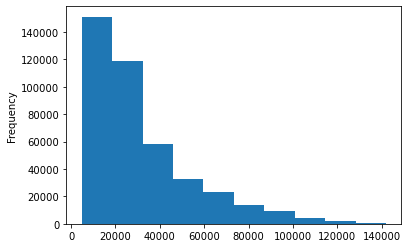

In [5]:
df.SalePrice.plot.hist()

## Parsing Dates

When we work with time series data, we want to enrich the time and date componenets as much as possible

We can do this by telling pandas which of our columns has dates in it, using the 'parse_dates' parameter

In [3]:
#Import Training and Validation Data inclusive of the parse_date parameter
df = pd.read_csv("bulldozers_data\TrainAndValid.csv", 
                 low_memory=False,
                parse_dates = ["saledate"])


In [8]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

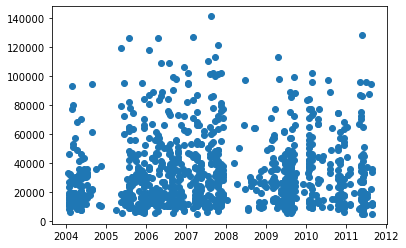

In [11]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [13]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort df by saledate
When working with time series data, it's a good idea to sort it by date

In [4]:
#Sort df in date order
df.sort_values(by = ["saledate"], inplace=True, ascending =True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the Original DataFrame
**It is a good practice to make a copy of the original dataframe so that when we manipulates the copy, the original remains intact**

In [5]:
df_temp = df.copy()

In [18]:
df_temp.head(20).T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,113394,116419,32138,127610,76171,127000,128130,127626,55455,55454
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,1449555,1453775,1264985,1475641,1364654,1474844,1476264,1475662,1305337,1305336
SalePrice,9500,14000,50000,16000,22000,23500,31000,11750,63000,13000,10500,20000,20000,23500,14000,11250,29000,22000,17000,17000
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,1102310,1514650,1204499,1194367,1270628,1279993,1245504,1242833,1517075,1236263
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,3356,7008,6788,7277,7289,7257,7277,7277,3356,3356
datasource,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
auctioneerID,18,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,1966,1974,1984,1973,1968,1979,1978,1973,1972,1972
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Add Datetime parameters for 'saledate' column

In [6]:
df_temp["saleYear"] = df_temp["saledate"].dt.year
df_temp["saleMonth"] = df_temp["saledate"].dt.month
df_temp["saleDay"] = df_temp["saledate"].dt.day
df_temp["saleDayofWeek"] = df_temp["saledate"].dt.dayofweek
df_temp["saleDayofYear"] = df_temp["saledate"].dt.dayofyear

In [7]:
df_temp["saleYear"][:1]

205615    1989
Name: saleYear, dtype: int64

In [9]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [7]:
#Now that we have enriched our dataframe with date time features we can drop the sale date column
df_temp.drop("saledate", axis=1, inplace=True)

In [12]:
#Check values of different columns
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

# Modeling
We've done enough EDA(we could always do more) but let's start to do some model driven EDA

In [8]:
#Let's build machine learning model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [16]:
df_temp.info()
df_temp.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

**From the above, Not all the data features are in numeric format. hence the "ValueError: could not convert string to float: 'Low'". Also there is a whole lot of missing data. So we must first take care of all these to be able to continue with the modelling**

### Convert strings to categories

**One way we can turn all our data into numbers is by converting them to pandas categories**

In [9]:
#Find the columns whic contains strings or rather that are not numeric
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [10]:
#This will turn all the string values into category values
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [19]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [22]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

**Thanks to pandas categories, we now have a way to access all our data in form of numbers. But we are yet to deal with the missing data issue**

In [11]:
### save the preprocessed dataframe
df_temp.to_csv("bulldozers_data/train_temp.csv", index=False)

In [30]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Filling Missing Values

### Fill Numeric Missing values first


In [12]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [13]:
#Check for which numeric columns has null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary column which tells us if the data was missing
            df_temp[label+"_is_missing"] = pd.isnull(content)
            #Fill missing numeric values with median
            df_temp[label]= content.fillna(content.median())

### Filling and turning cartegorical variables into numbers

In [14]:
#Check for columns which aren't numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [15]:
#Turn categorical variables into numbers and fill missing values
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add a binary column which tells us if the data was missing
        df_temp[label+"_is_missing"] = pd.isnull(content)
        #Turn categories into numbers and add 1.
        df_temp[label] = pd.Categorical(content).codes+1


In [16]:
#Check for columns which aren't numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [17]:
#check if there are any more missing values
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

**Now that our data are all numeric and there is no missing values, we should be able to build our model**

In [18]:
%%time
#Instantiate Model
model = RandomForestRegressor(random_state=42, n_jobs=-1)

#fit the model
model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

Wall time: 4min


RandomForestRegressor(n_jobs=-1, random_state=42)

In [19]:
#score the model
model.score(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

0.9875468079970562

**Question: Why isn't the above metric score reliable?** 
**Answer: our goal is to develop models that are able to do excellently well on data they have not seen before. Training and testing on the same data will not achieve the excellent performance being sought**

### Splitting adta into train and validation sets

In [17]:
#Split data into training and validation sets
df_val = df_temp[df_temp["saleYear"] == 2012]
df_train = df_temp[df_temp["saleYear"] != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [18]:
#split data into x and y
x_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
x_val, y_val = df_val.drop("SalePrice", axis=1), df_val.SalePrice 

#Check the shapes of the train and validation sets
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an Evauation Function

In [23]:
#Create and Evaluation Function(The competition uses Root Mean square Log Error(RMSLE))
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

#create scores to evaluate models on a few different levels
def show_scores(model):
    train_pred = model.predict(x_train)
    val_pred = model.predict(x_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_pred),
              "Valid MAE" : mean_absolute_error(y_val, val_pred),
              "Training RMSLE": rmsle(y_train, train_pred),
              "Valid RMSLE": rmsle(y_val, val_pred),
              "Training R^2": r2_score(y_train, train_pred),
              "Valid R^2": r2_score(y_val, val_pred)}
    return scores

## Testing our model on a subset to tune our hyperparameters

In [23]:
# This model below takes far too long... for experimenting. Taking about 5 minutes

# %%time

# model = randomForestRegressor(n_jobs=-1, random_state= 42)

# model.fit(x_train, y_train)

In [20]:
#Change max_samples value
model = RandomForestRegressor(n_jobs=-1, random_state= 42, max_samples=10000)


In [22]:
%%time
#cutting down on the max number of samples each estimators can see improves training time
model.fit(x_train, y_train)

Wall time: 11 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

**we can notice a considerable reduction in the time spent from the initial almost 5 minutes to just about 9 seconds**

In [24]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

**Note: The valid score metrics should be a bit higher than the Training score metrics. This confirms that there is no overfitting. Otherewise there is an overfitting and you have to take a second look at your model**

## Hyperparameters tuning with RandomizedSearchCV

In [30]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#Different RandomForestRegressor hyperparameters
rf_grid ={"n_estimators": np.arange(10, 100, 10),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2), 
          "min_samples_leaf": np.arange(1, 20, 2),
          "max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [10000]}

#instantiate RandomizedSearchCV model
rf_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2,
                             verbose=True,
                             cv=5)
#fit the RandomizedSearchCH model
rf_model.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 41.6 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [31]:
#Find the best model hyperparameters
rf_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 5}

In [32]:
#scores on rf_model(trained on only 10000 data)
show_scores(rf_model)

{'Training MAE': 11472.55751508427,
 'Valid MAE': 13284.74595034623,
 'Training RMSLE': 0.4968970182871567,
 'Valid RMSLE': 0.5096596045139847,
 'Training R^2': 0.5104874910922015,
 'Valid R^2': 0.5120241647201966}

**The model has become worse**

## Train a model with the best hyperparameters
**Note: these were found after a 100 itereations of "RandomizedSearchCV"(i.e setting n_iter=100)**

In [34]:
%%time
#Most Ideal hyperparameters
best_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_split=14,
                                   min_samples_leaf=1,
                                   max_features=0.5,
                                   max_samples=None,
                                   n_jobs=-1, 
                                   random_state=42)

                             
                             
#fit the RandomizedSearchCH model
best_model.fit(x_train, y_train)

Wall time: 49 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [36]:
#scores for best_model (trained on all data)
show_scores(best_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.2452416398953833,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

### Make Predictions on Test Data

In [40]:
df_test = pd.read_csv("bulldozers_data/Test.csv", low_memory=False, parse_dates=["saledate"])

In [41]:
df_test.head(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the data(Getting the test dataset in the same format with the training set dataset)

In [43]:
def preprocess_data(df):
    """
    Performs a transformation on df and returns a transformed df
    """
    df["saleYear"] = df["saledate"].dt.year
    df["saleMonth"] = df["saledate"].dt.month
    df["saleDay"] = df["saledate"].dt.day
    df["saleDayofWeek"] = df["saledate"].dt.dayofweek
    df["saleDayofYear"] = df["saledate"].dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    #fill the numeric rows wit median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #Add a binary column which tells us if the data was missing
                df[label+"_is_missing"] = pd.isnull(content)
                #Fill missing numeric values with median
                df[label]= content.fillna(content.median())
    
    #fill categorical data and turn categories into number
        if not pd.api.types.is_numeric_dtype(content):
            #Add a binary column which tells us if the data was missing
            df[label+"_is_missing"] = pd.isnull(content)
            #Turn categories into numbers and add 1.
            df[label] = pd.Categorical(content).codes+1

    return df


In [44]:
df_test = preprocess_data(df_test)
df_test.head(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [45]:
x_train.head(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


**there is a difference between the number of columns in the training set and that of the test set. How do we detect this difference? we can find how the columns differ using python set**

In [46]:
#Finding the difference
set(x_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [47]:
#Manually adjust df_test to have "auctioneerID_is_missing" column
df_test["auctioneerID_is_missing"] = False

In [48]:
#Check if there is still any difference between the two datasets
set(x_train.columns) - set(df_test.columns)

set()

**Now our test datasets has the same features as the training datasets. we can make predictions**

In [49]:
test_pred = best_model.predict(df_test)

C:\Users\FRINICT\Desktop\datascience\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [50]:
test_pred

array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

**We ve made some predictions but it is not yet in the same format kaggle asked for: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation**

In [51]:
df_pred = pd.DataFrame()
df_pred["SalesID"] = df_test.SalesID
df_pred["SalesPrice"] = test_pred
df_pred

,SalesID,SalesPrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


In [52]:
#Export prediction data
df_pred.to_csv("bulldozers_data/test_predictions.csv")

### Feature Importance

Feature Important seeks to figure out, which attributes(features) of the data were most important in predicting the **target Variable** (SalePrice)

In [53]:
#Find the feature importance of our best model
best_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [62]:
#Helper Function for plotting feature importance
def plot_features(columns, importances, n=20):
    df =(pd.DataFrame({"features": columns,
                      "feature_importances": importances})
        .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True))
    
    #plot the DataFrame
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

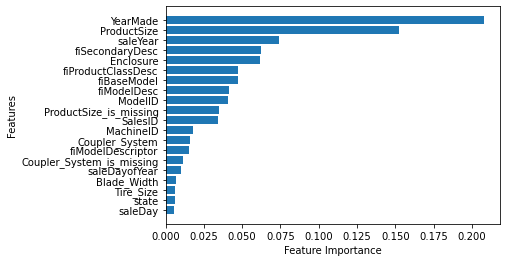

In [63]:
plot_features(x_train.columns, best_model.feature_importances_)

**Question to finish:** Why might knoowing the feature importances of a trained machine learning model be helpful?

**Final Challenge:** What other machine learning models could you try on our dataset: Hint https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html. check out the regression section of this map or try to look at something like CatBoost.ai, or XGBoost.ai